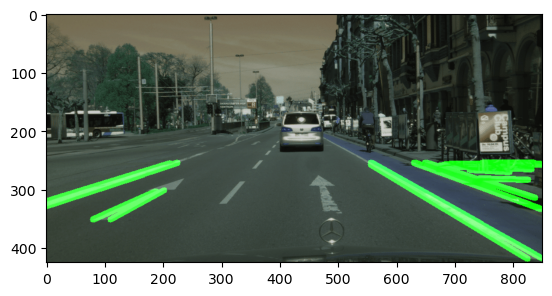

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

def detect_road_markings(image_path):
    # Read the image
    image = cv2.imread(image_path)
    original_image = image.copy()
    height, width = image.shape[:2]

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection
    edges = cv2.Canny(blurred, 50, 90, apertureSize=3)

    # Define a region of interest (ROI)
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (0, height),
        (width, height),
        (width, int(height * 0.6)),
        (0, int(height * 0.6))
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    cropped_edges = cv2.bitwise_and(edges, mask)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(
        cropped_edges,
        rho=1,
        theta=np.pi / 180,
        threshold=50,
        minLineLength=60,
        maxLineGap=20
    )

    # Draw the detected lines on the image
    if lines is not None:
        image_with_lines = drow_the_lines(original_image, lines)
    else:
        image_with_lines = original_image

    # Display the result
    plt.imshow(image_with_lines)
    plt.show()

# Example usage
detect_road_markings("images/image_2.png")
